In [1]:
from collections import deque, defaultdict, Counter
from heapq import heapify, heappush, heappop
import numpy as np
from copy import deepcopy
import math
import time
from functools import cache, reduce, cmp_to_key
import graphviz
from itertools import product
import matplotlib.pyplot as plt
from bisect import bisect_left, bisect_right
import json
import os
import re
from typing import Any
from dataclasses import dataclass

In [2]:
dirs4 = [(-1, 0), (0, 1), (1, 0), (0, -1)]
dirs8 = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]

today = os.path.basename(globals()["__vsc_ipynb_file__"]).split(".")[0]  # + "_ex"
today

'day14'

In [3]:
def get_lines() -> list[str]:
    lines = []
    with open(f"./data/{today}.txt") as f:
        while line := f.readline():
            lines.append(line.rstrip())
    return lines

def get_grid() -> list[list[str]]:
    grid = []
    with open(f"./data/{today}.txt") as f:
        while line := f.readline():
            grid.append([c for c in line.rstrip()])
    return grid

def parse_nums(s: str) -> list[int]:
    return [int(x) for x in re.findall(r"\d+", s)]

def get_nums() -> list[list[int]]:
    lines = get_lines()
    return [parse_nums(line) for line in lines]

def is_inside_grid(coords: tuple[int, int], grid: list[list[Any]]) -> bool:
    return coords[0] in range(len(grid)) and coords[1] in range(len(grid[0]))

In [4]:
x_limit = 101
y_limit = 103


@dataclass
class Robot:
    pos: np.ndarray
    vel: np.ndarray
    x_limit: int
    y_limit: int

    def step(self, steps: int = 1) -> None:
        self.pos += steps*self.vel
        self.pos[0] %= self.x_limit
        self.pos[1] %= self.y_limit


robots: list[Robot] = []
with open(f"./data/{today}.txt") as f:
    while line := f.readline():
        line = line.rstrip()
        pos = [int(x) for x in line[2:].split()[0].split(",")]
        vel = [int(x) for x in line.split()[1][2:].split(",")]
        robots.append(Robot(np.array(pos), np.array(vel), x_limit, y_limit))
len(robots)

500

In [5]:
s = defaultdict(int)
for robot in robots:
    robot.step(100)
    
    if robot.pos[0] == x_limit // 2 or robot.pos[1] == y_limit // 2:
        continue
    s[(robot.pos[0] // ((x_limit // 2) + 1), robot.pos[1] // ((y_limit // 2) + 1))] += 1
math.prod(s.values())

217328832

In [6]:
def plot_bots(
    robots: list[Robot], x_limit: int, y_limit: int, step: int = 0, save: bool = False
) -> None:
    arr = np.zeros((x_limit, y_limit))
    for bot in robots:
        arr[*bot.pos] = min(255, arr[*bot.pos] + 1)  # type: ignore
    if save:
        plt.imsave(f"images/{step}.png", arr)
    else:
        plt.imshow(arr)

In [7]:
robots: list[Robot] = []
with open(f"./data/{today}.txt") as f:
    while line := f.readline():
        line = line.rstrip()
        pos = [int(x) for x in line[2:].split()[0].split(",")]
        vel = [int(x) for x in line.split()[1][2:].split(",")]
        robots.append(Robot(np.array(pos), np.array(vel), x_limit, y_limit))

In [8]:
for steps in range(1, 500):
    for bot in robots:
        bot.step(1)
    plot_bots(robots, x_limit, y_limit, steps, True)

Staring at the images there are two visible patterns that appear:
- a horizontal pattern that appears after 39, 140, 241, 342, 443, ... steps,
- a vertical pattern that appears after 99, 202, 305, 408, ... steps.

Discarding the first appearance of the horizontal pattern, we see that the horizontal pattern appears at an interval of 101 steps and the vertical pattern at an interval of 103 steps.

A reasonable guess is that the easter egg appears when the patterns collide. When does this happen first?

In [9]:
for i in range(5000):
    if (140 + 101*i - 99) % 103 == 0:
        print(140 + 101*i)
        break

7412


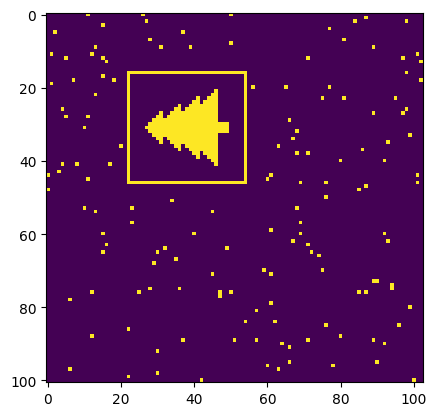

In [10]:
for bot in robots:
    bot.step(7412 - 499)  # already took 499 steps for each robot to plot images
plot_bots(robots, x_limit, y_limit)